In [4]:
import sklearn
import json
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

valor_verdade = []
valor_previsto = []

with open('test.json') as f:
    test = json.load(f)
    
with open('predicao_05.json') as p:
    predicoes = json.load(p)
    
for user in test:
    for filme in user["filmes"]:
        valor_verdade.append(int(filme["avaliacao"]))
    
for user in predicoes:
    for filme in user["filmes"]:
        valor_previsto.append(round(float(filme["predicao"])))


MEAN ABSOLUTE ERROR 

In [5]:
import numpy as np

y_true = np.array(valor_verdade)
y_scores = np.array(valor_previsto)

mean_absolute_error(y_true, y_scores)

#mean_absolute_error(valor_verdade, valor_previsto)


0.9140589088844755

ROOT MEAN SQUARED ERROR

In [7]:
sqrt(mean_squared_error(y_true, y_scores))


0.9140589088844755

CURVA ROC

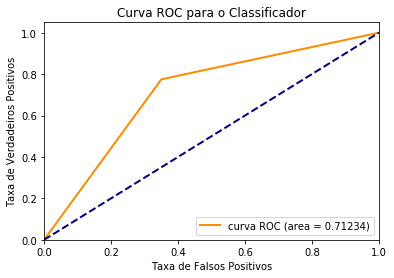

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

rec_true = []
rec_scores = []

for each in y_true:
    rec_true.append(each >= 4)
    
for each in y_scores:
    rec_scores.append(each >= 4)
    
roc_area = roc_auc_score(rec_true, rec_scores)

fpr, tpr, _ = roc_curve(rec_true, rec_scores)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='curva ROC (area = %0.5f)' % roc_area)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para o Classificador')
plt.legend(loc="lower right")
plt.show()

MATRIZ DE CONFUSÃO

In [20]:
from sklearn.metrics import confusion_matrix

## diagonal são os verdadeiros positivos pra cada classe (1,2,3,4,5)
cfm = confusion_matrix(rec_true, rec_scores)
tn, fp, fn, tp = cfm.ravel()
cfm

#DESCOMENTA A LINHA QUANDO TIVER O VALOR PREVISTO
#confusion_matrix(valor_verdade, valor_previsto)


array([[39903, 21520],
       [18626, 64167]])

TRUE POSITIVE RATE (TPR)

In [23]:
tpr = float(tp)/(tp+fn)
tpr


0.7750292899158141

PRECISION OR POSITIVE PREDICTIVE VALUE (PPV)

In [24]:
ppv = float(tp)/(tp + fp)
ppv


0.7488533849942232